# Análisis Exploratorio de Datos

Este notebook explora y analiza exhaustivamente un conjunto de datos mediante técnicas de análisis exploratorio. El análisis se centra en comprender la naturaleza, distribución y relaciones presentes en los datos, empleando visualizaciones, estadísticas descriptivas y técnicas de manipulación de datos.

### Objetivos:
- Explorar la estructura y contenido del conjunto de datos.
- Identificar patrones, tendencias y posibles relaciones entre variables.


### Contenido:
1. **Exploración inicial:** Revisión de la estructura de datos, dimensiones y tipos de variables.
2. **Análisis univariado:** Estudio de distribuciones, estadísticas descriptivas y visualizaciones de cada variable por separado.
3. **Análisis bivariado:** Exploración de relaciones entre variables mediante gráficos de dispersión, correlaciones y tablas de contingencia.


In [275]:
# importacion de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## 1. cargar los datos y obtener información general de cada alumno
**Exploración inicial:** Revisión de la estructura de datos, dimensiones y tipos de variables.

In [276]:
# cargar los datos y definir un dataframe
path= 'estudiantes.csv'

df_estudiantes = pd.read_csv(path, sep=',')

In [277]:
df_estudiantes.head()

,COD_PRO_RBD,RBD,MRUN,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,COD_ENSE2,DIAS_ASISTIDOS,ASIS_PROMEDIO,COD_REG_RBD,COD_JOR,PROM_GRAL,SIT_FIN_R,COD_COM_RBD,BEN_SEP,PREFERENTE_ALU,PRIORITARIO_ALU
0,31,396,1868052,2,200805,3101,7,14,0.70,3,3,4.7,R,3101,1,0,1
1,31,396,17387260,2,200712,3101,7,15,0.75,3,3,3.6,R,3101,1,1,0
2,31,396,19326217,1,200711,3101,7,10,0.50,3,3,4.5,R,3101,1,0,1
3,31,396,1131685,1,200703,3101,7,12,0.60,3,3,3.7,R,3101,1,0,1
4,31,396,23086414,2,200710,3101,7,14,0.70,3,3,4.3,R,3101,1,0,1


In [278]:
df_estudiantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567637 entries, 0 to 567636
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   COD_PRO_RBD      567637 non-null  int64  
 1   RBD              567637 non-null  int64  
 2   MRUN             567637 non-null  int64  
 3   GEN_ALU          567637 non-null  int64  
 4   FEC_NAC_ALU      567637 non-null  int64  
 5   COD_COM_ALU      567637 non-null  int64  
 6   COD_ENSE2        567637 non-null  int64  
 7   DIAS_ASISTIDOS   567637 non-null  int64  
 8   ASIS_PROMEDIO    567637 non-null  float64
 9   COD_REG_RBD      567637 non-null  int64  
 10  COD_JOR          567637 non-null  int64  
 11  PROM_GRAL        567637 non-null  float64
 12  SIT_FIN_R        567637 non-null  object 
 13  COD_COM_RBD      567637 non-null  int64  
 14  BEN_SEP          567637 non-null  int64  
 15  PREFERENTE_ALU   567637 non-null  int64  
 16  PRIORITARIO_ALU  567637 non-null  int6

In [279]:
# ESTO ESTA HORRIBLE LO SE, LO TENGO QUE AGREGAR A UN ARCHIVO Y CARGARLO EN EL JUPYTER, PERO SI NO ALCANZO MEJOR TENERLO
diccionario_comunas = {
    13101: 'Santiago',
    13102: 'Cerrillos',
    13103: 'Cerro Navia',
    13104: 'Conchalí',
    13105: 'El Bosque',
    13106: 'Estación Central',
    13107: 'Huechuraba',
    13108: 'Independencia',
    13109: 'La Cisterna',
    13110: 'La Florida',
    13111: 'La Granja',
    13112: 'La Pintana',
    13113: 'La Reina',
    13114: 'Las Condes',
    13115: 'Lo Barnechea',
    13116: 'Lo Espejo',
    13117: 'Lo Prado',
    13118: 'Macul',
    13119: 'Maipú',
    13120: 'Ñuñoa',
    13121: 'Pedro Aguirre Cerda',
    13122: 'Peñalolén',
    13123: 'Providencia',
    13124: 'Pudahuel',
    13125: 'Quilicura',
    13126: 'Quinta Normal',
    13127: 'Recoleta',
    13128: 'Renca',
    13129: 'San Joaquín',
    13130: 'San Miguel',
    13131: 'San Ramón',
    13132: 'Vitacura',
    13201: 'Puente Alto',
    13202: 'Pirque',
    13203: 'San José de Maipo',
    13301: 'Colina',
    13302: 'Lampa',
    13303: 'Tiltil',
    13401: 'San Bernardo',
    13402: 'Buin',
    13403: 'Calera de Tango',
    13404: 'Paine',
    13501: 'Melipilla',
    13502: 'Alhué',
    13503: 'Curacaví',
    13504: 'María Pinto',
    13505: 'San Pedro',
    13601: 'Talagante',
    13602: 'El Monte',
    13603: 'Isla de Maipo',
    13604: 'Padre Hurtado',
    13605: 'Peñaflor',
    3101: 'Copiapó',
    3102: 'Caldera',
    3103: 'Tierra Amarilla'
}

In [280]:
df_estudiantes['CODIGO_COMUNA_ALUMNO'] = df_estudiantes['COD_COM_ALU'].copy()  # Duplicar columna

In [281]:
df_estudiantes['CODIGO_COMUNA_RBD'] = df_estudiantes['COD_COM_RBD'].copy()  # Duplicar columna

In [282]:
# Reemplaza los códigos por los nombres de las comunas en la columna "COD_COM_ALU"
df_estudiantes['NOM_COM_ALU'] = df_estudiantes['COD_COM_ALU'].replace(diccionario_comunas)

In [283]:
# Reemplaza los códigos por los nombres de las comunas en la columna "COD_COM_ALU"
df_estudiantes['COD_COM_RBD'] = df_estudiantes['COD_COM_RBD'].replace(diccionario_comunas)

In [284]:
df_estudiantes.head()

,COD_PRO_RBD,RBD,MRUN,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,COD_ENSE2,DIAS_ASISTIDOS,ASIS_PROMEDIO,COD_REG_RBD,COD_JOR,PROM_GRAL,SIT_FIN_R,COD_COM_RBD,BEN_SEP,PREFERENTE_ALU,PRIORITARIO_ALU,CODIGO_COMUNA_ALUMNO,CODIGO_COMUNA_RBD,NOM_COM_ALU
0,31,396,1868052,2,200805,3101,7,14,0.70,3,3,4.7,R,Copiapó,1,0,1,3101,3101,Copiapó
1,31,396,17387260,2,200712,3101,7,15,0.75,3,3,3.6,R,Copiapó,1,1,0,3101,3101,Copiapó
2,31,396,19326217,1,200711,3101,7,10,0.50,3,3,4.5,R,Copiapó,1,0,1,3101,3101,Copiapó
3,31,396,1131685,1,200703,3101,7,12,0.60,3,3,3.7,R,Copiapó,1,0,1,3101,3101,Copiapó
4,31,396,23086414,2,200710,3101,7,14,0.70,3,3,4.3,R,Copiapó,1,0,1,3101,3101,Copiapó


In [285]:
df_estudiantes[[ 'PROM_GRAL' ,'ASIS_PROMEDIO','DIAS_ASISTIDOS']].describe()

,PROM_GRAL,ASIS_PROMEDIO,DIAS_ASISTIDOS
count,567637.000000,567637.000000,567637.000000
mean,5.920682,0.839460,17.525783
std,0.832130,0.165138,3.503947
min,0.000000,0.045455,1.000000
25%,5.600000,0.761905,16.000000
50%,6.000000,0.900000,18.000000
75%,6.400000,0.952381,20.000000
max,7.000000,1.000000,22.000000


### Días Asistidos:

**Distribución:** La mayoría de los estudiantes asisten entre 15 y 20 días, con un promedio de alrededor de 17 días. Existe una variabilidad relativamente baja, ya que la desviación estándar es de aproximadamente 3.69 días.

**Asistencia:** La asistencia promedio es alta, con una media de aproximadamente 0.826 (equivalente al 82.6% de asistencia). La mayoría de los estudiantes tienen una asistencia superior al 75% (0.75 en la escala de 0 a 1).
Promedio General:

### Nivel promedio: 

El promedio general promedio está alrededor de 5.94 en una escala de 1 a 7. La mayoría de los estudiantes tienen promedios entre 5.6 y 6.4.

**Distribución:** La dispersión en los promedios es moderada, con una desviación estándar de aproximadamente 0.60.  Esto sugiere cierta diversidad en el rendimiento de los estudiante

<Axes: xlabel='ASIS_PROMEDIO', ylabel='Count'>

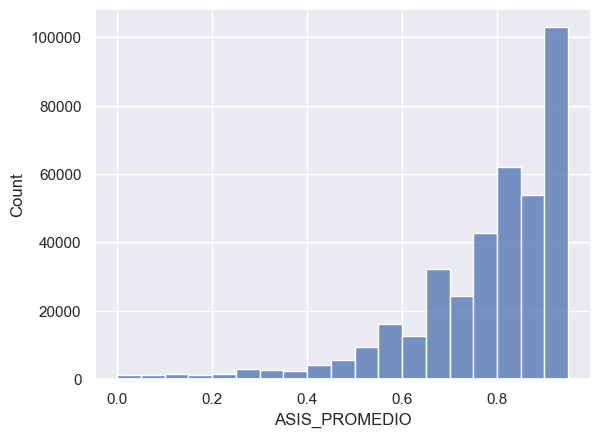

In [286]:
sns.histplot(data=df_estudiantes, x='ASIS_PROMEDIO', bins=np.arange(0,1,0.05))

<Axes: xlabel='PROM_GRAL', ylabel='Count'>

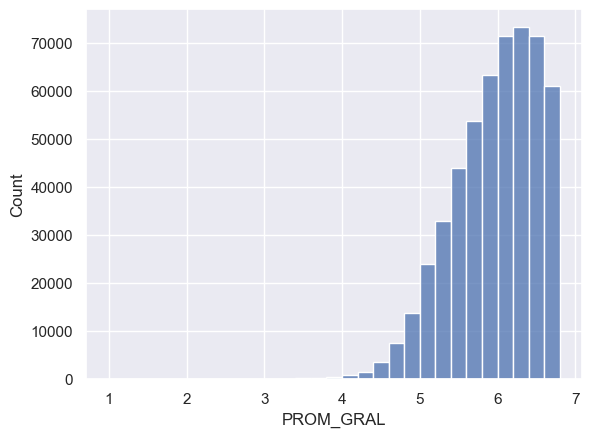

In [287]:
sns.histplot(data=df_estudiantes, x='PROM_GRAL',bins=np.arange(1,7,0.2))

In [288]:
def grafico_distribuciones(columna):
    counts = df_estudiantes[columna].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Porcentaje de valores en la columna {columna}')
    plt.show()

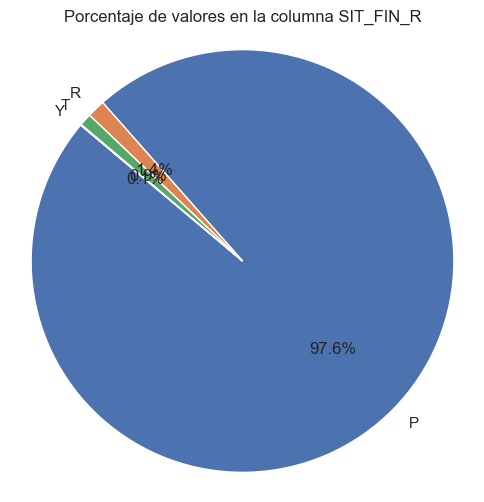

In [289]:
grafico_distribuciones('SIT_FIN_R')

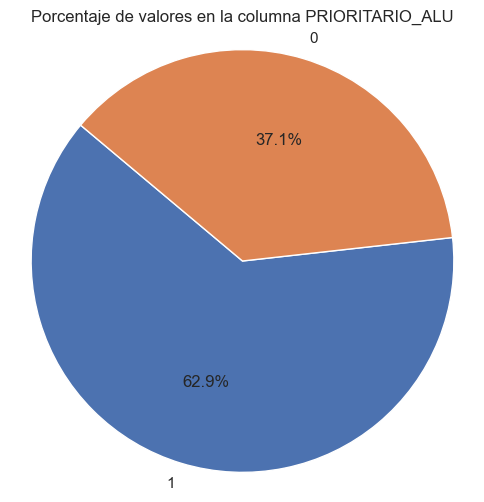

In [290]:
grafico_distribuciones('PRIORITARIO_ALU')

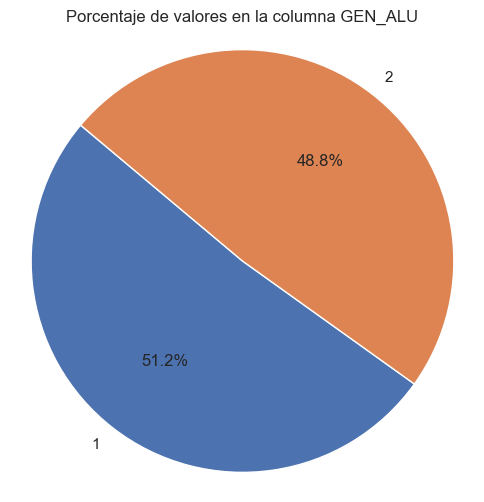

In [291]:
grafico_distribuciones('GEN_ALU')

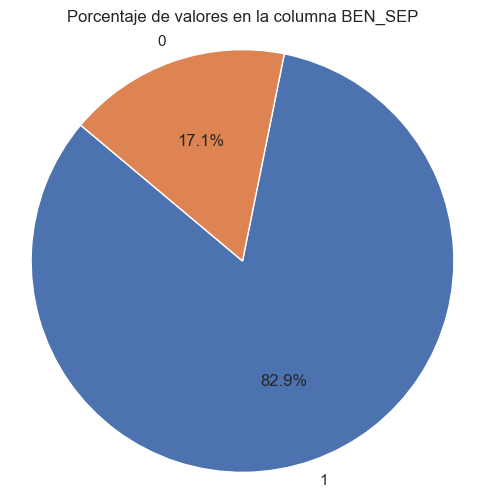

In [292]:

grafico_distribuciones('BEN_SEP')


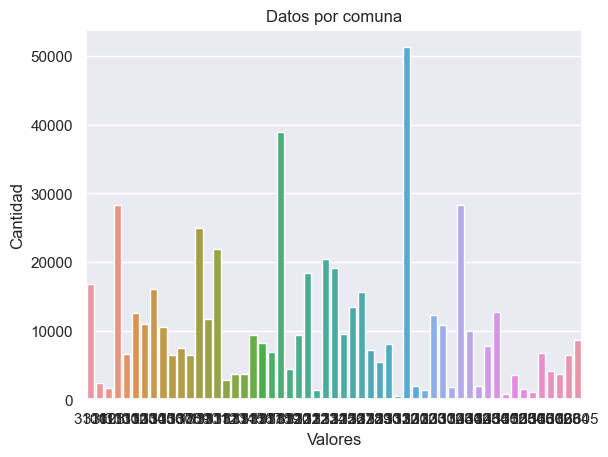

In [293]:
# vizualizar la cantidad de datos que tenemos para cada comuna
sns.countplot(data= df_estudiantes, x='COD_COM_ALU')
plt.xlabel('Valores')
plt.ylabel('Cantidad')
plt.title('Datos por comuna')
plt.show()

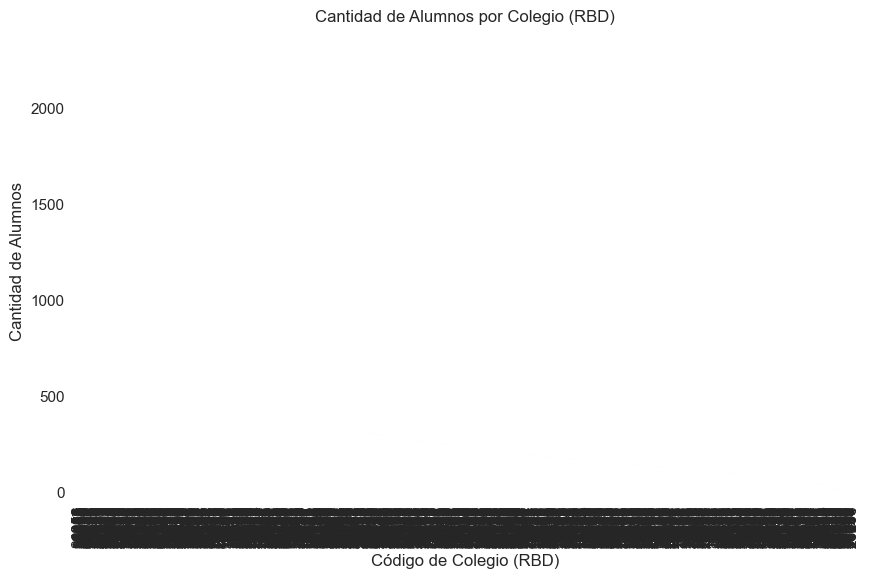

In [294]:
alumnos_por_colegio = df_estudiantes['RBD'].value_counts()

plt.figure(figsize=(10, 6))
alumnos_por_colegio.plot(kind='bar')
plt.xlabel('Código de Colegio (RBD)')
plt.ylabel('Cantidad de Alumnos')
plt.title('Cantidad de Alumnos por Colegio (RBD)')
plt.show()

## 2. Estadísticas de resumen y analisis de relaciones; por comuna del alumno

Esta sección presenta un resumen estadístico de los datos, proporcionando métricas clave que describen la distribución, la tendencia central y la dispersión de las variables en el conjunto de datos.

### Contenido:
- **Medidas de tendencia central:** Incluye la media, la mediana y la moda para comprender el valor central de las variables.
- **Medidas de dispersión:** Muestra la varianza, desviación estándar y rangos intercuartílicos para evaluar la dispersión de los datos.
- **Resúmenes adicionales:** Puede incorporar conteos, mínimos, máximos y otros resúmenes relevantes para cada variable.


## Aristas a analizar
**Estadisticas Resumen por region** 
- comparación entre copiapó y santiago

**Estadisticas Resumen por comuna** 
- obtener máximos y minimos de asistencia y promedios por por comuna, así como los deciles.

**Estadisticas Resumen por Beneficiario/ No Beneficiario** por region y relación con notas

- identificar comunas más vulnerables para analisar el desempeño de los estudiantes en estas


## Agregando proporcion de Beneficiarios y preferentes SEP

In [295]:
# Filtrar solo los estudiantes beneficiarios
preferentes = df_estudiantes[df_estudiantes['PREFERENTE_ALU'] == 1]  # Aquí asumo que el valor '1' representa estudiantes beneficiarios

# Calcular el número de estudiantes preferentes por comuna
preferentes_por_comuna = preferentes.groupby(['COD_COM_ALU','NOM_COM_ALU']).size().reset_index(name='Preferentes_SEP')

# Calcular el número total de estudiantes por comuna
total_por_comuna = df_estudiantes.groupby('COD_COM_ALU').size().reset_index(name='Total')

# Combinar los datos de estudiantes preferentes y totales por comuna
porcentaje_preferentes = pd.merge(preferentes_por_comuna, total_por_comuna, on='COD_COM_ALU')

# Calcular el porcentaje de estudiantes preferentes por comuna y agregarlo como una nueva columna
porcentaje_preferentes['Porcentaje_preferentes'] = (porcentaje_preferentes['Preferentes_SEP'] / porcentaje_preferentes['Total']) * 100

In [296]:
porcentaje_preferentes.head()

,COD_COM_ALU,NOM_COM_ALU,Preferentes_SEP,Total,Porcentaje_preferentes
0,3101,Copiapó,5188,16852,30.785663
1,3102,Caldera,456,2368,19.256757
2,3103,Tierra Amarilla,320,1613,19.838810
3,13101,Santiago,12617,28359,44.490285
4,13102,Cerrillos,2354,6623,35.542805


## Agregando promedios de aprovacion de cursos por comuna

In [297]:
# Filtrar solo los estudiantes aprobados 
aprobados =  df_estudiantes[df_estudiantes['SIT_FIN_R'] == 'R']

# Calcular el número de estudiantes aprobados por comuna
aprobados_por_comuna = aprobados.groupby('COD_COM_ALU').size().reset_index(name='Reprobados')

# Calcular el número total de estudiantes por comuna
total_por_comuna =  df_estudiantes.groupby('COD_COM_ALU').size().reset_index(name='Total')

#Combinar los datos de aprobados y totales por comuna
porcentaje_aprobacion = pd.merge(aprobados_por_comuna, total_por_comuna, on='COD_COM_ALU')

# Calcular el porcentaje de aprobación y agregarlo como una nueva columna
porcentaje_aprobacion['Porcentaje_Reprobados'] = (porcentaje_aprobacion['Reprobados'] / porcentaje_aprobacion['Total']) * 100

In [298]:
porcentaje_aprobacion.head()

,COD_COM_ALU,Reprobados,Total,Porcentaje_Reprobados
0,3101,264,16852,1.566580
1,3102,23,2368,0.971284
2,3103,18,1613,1.115933
3,13101,318,28359,1.121337
4,13102,86,6623,1.298505


## Agregando promedios de asistencia y notas por comuna 

In [299]:

estudiantes_mean_comuna = df_estudiantes[['ASIS_PROMEDIO','PROM_GRAL','COD_COM_ALU','DIAS_ASISTIDOS']].groupby(by='COD_COM_ALU',as_index=False).mean()

estudiantes_mean_comuna.head()

,COD_COM_ALU,ASIS_PROMEDIO,PROM_GRAL,DIAS_ASISTIDOS
0,3101,0.741999,5.970805,14.779195
1,3102,0.754979,5.980659,15.079392
2,3103,0.740889,5.886547,14.848109
3,13101,0.841701,6.130569,17.346768
4,13102,0.830557,5.874709,17.448890


## Juntando la información obtenida

In [300]:
df_estudiantes_mean_comuna = pd.merge(estudiantes_mean_comuna, porcentaje_preferentes[['Porcentaje_preferentes','COD_COM_ALU','NOM_COM_ALU']] , on='COD_COM_ALU', how='inner')
# Agregar la columna 'Porcentaje_Aprobacion' al DataFrame original
df_estudiantes_comuna = pd.merge(df_estudiantes_mean_comuna, porcentaje_aprobacion[['COD_COM_ALU', 'Porcentaje_Reprobados']], on='COD_COM_ALU', how='left')

df_estudiantes_comuna.head()

,COD_COM_ALU,ASIS_PROMEDIO,PROM_GRAL,DIAS_ASISTIDOS,Porcentaje_preferentes,NOM_COM_ALU,Porcentaje_Reprobados
0,3101,0.741999,5.970805,14.779195,30.785663,Copiapó,1.566580
1,3102,0.754979,5.980659,15.079392,19.256757,Caldera,0.971284
2,3103,0.740889,5.886547,14.848109,19.838810,Tierra Amarilla,1.115933
3,13101,0.841701,6.130569,17.346768,44.490285,Santiago,1.121337
4,13102,0.830557,5.874709,17.448890,35.542805,Cerrillos,1.298505


In [301]:
df_estudiantes_comuna.head()

,COD_COM_ALU,ASIS_PROMEDIO,PROM_GRAL,DIAS_ASISTIDOS,Porcentaje_preferentes,NOM_COM_ALU,Porcentaje_Reprobados
0,3101,0.741999,5.970805,14.779195,30.785663,Copiapó,1.566580
1,3102,0.754979,5.980659,15.079392,19.256757,Caldera,0.971284
2,3103,0.740889,5.886547,14.848109,19.838810,Tierra Amarilla,1.115933
3,13101,0.841701,6.130569,17.346768,44.490285,Santiago,1.121337
4,13102,0.830557,5.874709,17.448890,35.542805,Cerrillos,1.298505


In [302]:
df_estudiantes_comuna[['ASIS_PROMEDIO','PROM_GRAL','DIAS_ASISTIDOS','Porcentaje_preferentes','Porcentaje_Reprobados']].describe()

,ASIS_PROMEDIO,PROM_GRAL,DIAS_ASISTIDOS,Porcentaje_preferentes,Porcentaje_Reprobados
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,0.833884,5.929821,17.366715,36.283839,1.338748
std,0.041363,0.070095,1.010556,8.908564,0.399967
min,0.651055,5.750927,13.659517,19.256757,0.443241
25%,0.830568,5.880584,17.030858,30.587904,1.118635
50%,0.837148,5.919387,17.565948,34.964029,1.315020
75%,0.854727,5.976324,18.020573,41.375283,1.504575
max,0.911573,6.130569,19.024492,58.955224,2.494577


## **Concluciones a partir de las estadisticas promedio**

**Asistencia Promedio:**

La asistencia promedio de los estudiantes por comuna se sitúa alrededor del 83.39% en promedio.
Existe una variabilidad considerable en la asistencia entre comunas, desde un mínimo del 65.11% hasta un máximo del 91.16%.

**Promedio General de Desempeño:**

El promedio general de desempeño académico se encuentra alrededor de 5.93.
La variabilidad en el desempeño general entre comunas es relativamente baja, con valores que oscilan entre 5.75 y 6.13.

**Días Asistidos:**

Los estudiantes en promedio asisten a clases durante aproximadamente 17.37 días.
La variabilidad en la cantidad de días asistidos entre las comunas es moderada, variando desde 13.66 días hasta 19.02 días.

**Porcentaje de Estudiantes Preferentes:**

El promedio del porcentaje de estudiantes preferentes por comuna es del 36.28%.
Hay una variabilidad notable en la proporción de estudiantes preferentes entre las comunas, desde un mínimo del 19.26% hasta un máximo del 58.96%.

En resumen, estas conclusiones indican que hay diferencias significativas entre las comunas en términos de asistencia, rendimiento académico y la proporción de estudiantes preferentes. Mientras que algunas comunas tienen una asistencia y rendimiento académico más altos, otras pueden enfrentar desafíos con una proporción más alta de estudiantes en situación de vulnerabilidad


In [303]:
# Encuentra el índice del valor mínimo y máximo en 'ASISTENCIA_PROMEDIO'
idx_min_asistencia = df_estudiantes_mean_comuna['DIAS_ASISTIDOS'].idxmin()
idx_max_asistencia = df_estudiantes_mean_comuna['DIAS_ASISTIDOS'].idxmax()

# Encuentra el índice del valor mínimo y máximo en 'PROM_GRAL'
idx_min_promedio = df_estudiantes_mean_comuna['PROM_GRAL'].idxmin()
idx_max_promedio = df_estudiantes_mean_comuna['PROM_GRAL'].idxmax()

# Obtiene las filas completas correspondientes a los índices
fila_min_asistencia = df_estudiantes_mean_comuna.loc[[idx_min_asistencia]]
fila_max_asistencia = df_estudiantes_mean_comuna.loc[[idx_max_asistencia]]
fila_min_promedio = df_estudiantes_mean_comuna.loc[[idx_min_promedio]]
fila_max_promedio = df_estudiantes_mean_comuna.loc[[idx_max_promedio]]


print("Comuna con la peor asistencia:")
print(fila_min_asistencia)

print("Comuna con la peor promedio:")
print(fila_min_promedio)

print("Comuna con la mejor asistencia:")
print(fila_max_asistencia)

print("Comuna con el mejor promedio:")
print(fila_max_promedio)


Comuna con la peor asistencia:
    COD_COM_ALU  ASIS_PROMEDIO  PROM_GRAL  DIAS_ASISTIDOS  \
46        13502       0.651055   5.978686       13.659517   

    Porcentaje_preferentes NOM_COM_ALU  
46               27.077748       Alhué  
Comuna con la peor promedio:
    COD_COM_ALU  ASIS_PROMEDIO  PROM_GRAL  DIAS_ASISTIDOS  \
17        13115       0.875521   5.750927       18.403164   

    Porcentaje_preferentes   NOM_COM_ALU  
17               41.762139  Lo Barnechea  
Comuna con la mejor asistencia:
    COD_COM_ALU  ASIS_PROMEDIO  PROM_GRAL  DIAS_ASISTIDOS  \
38        13301       0.901361   5.829513       19.024492   

    Porcentaje_preferentes NOM_COM_ALU  
38               29.103866      Colina  
Comuna con el mejor promedio:
   COD_COM_ALU  ASIS_PROMEDIO  PROM_GRAL  DIAS_ASISTIDOS  \
3        13101       0.841701   6.130569       17.346768   

   Porcentaje_preferentes NOM_COM_ALU  
3               44.490285    Santiago  


## Vizualizacion de la información

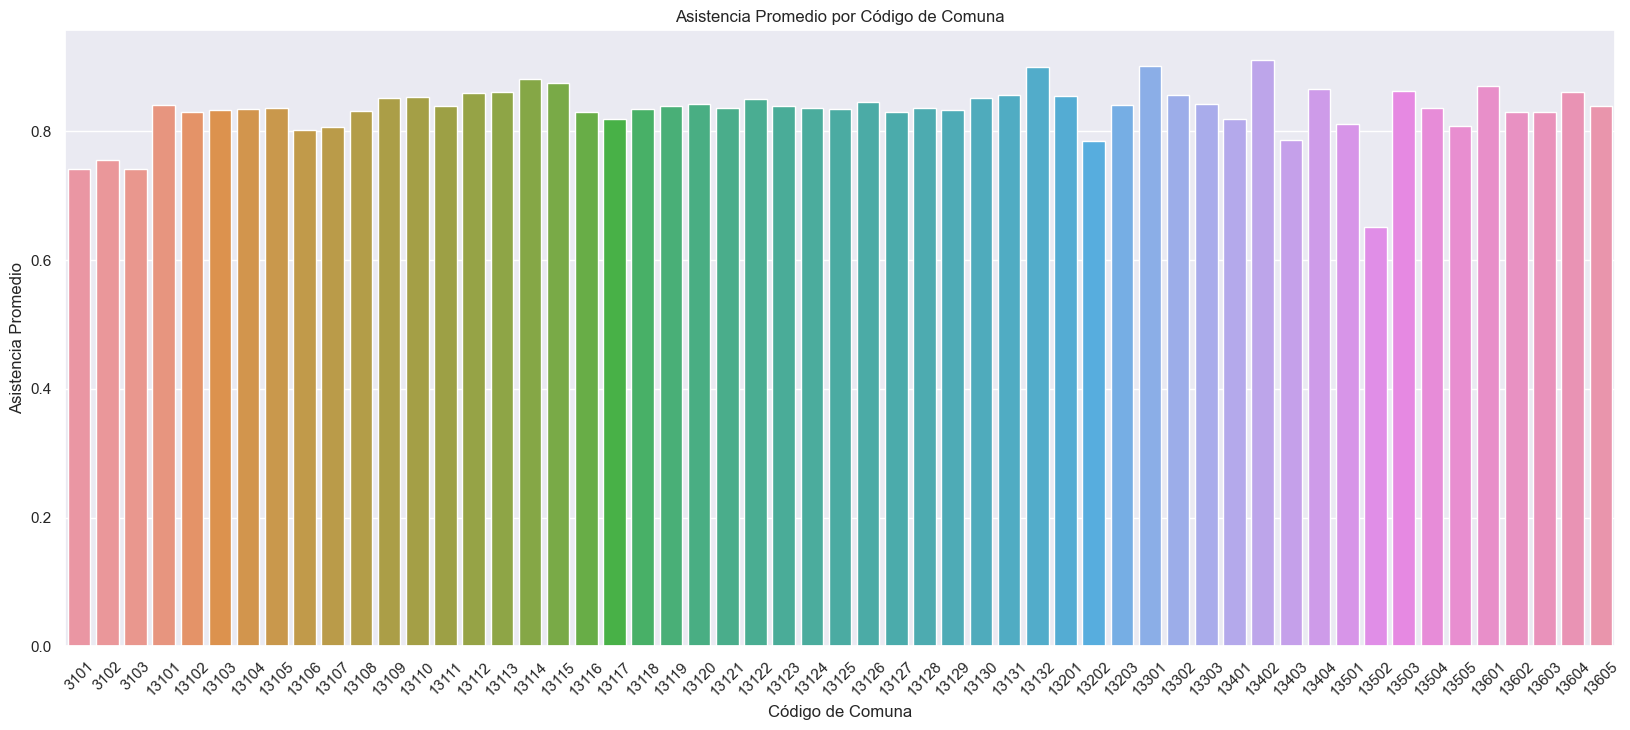

In [304]:

# grafico de barras para la asistencia promedio por comuna
plt.figure(figsize=(20, 8))
sns.barplot(x='COD_COM_ALU', y='ASIS_PROMEDIO', data=df_estudiantes_comuna)
plt.title('Asistencia Promedio por Código de Comuna')
plt.xlabel('Código de Comuna')
plt.ylabel('Asistencia Promedio')
plt.xticks(rotation=45)
plt.show()

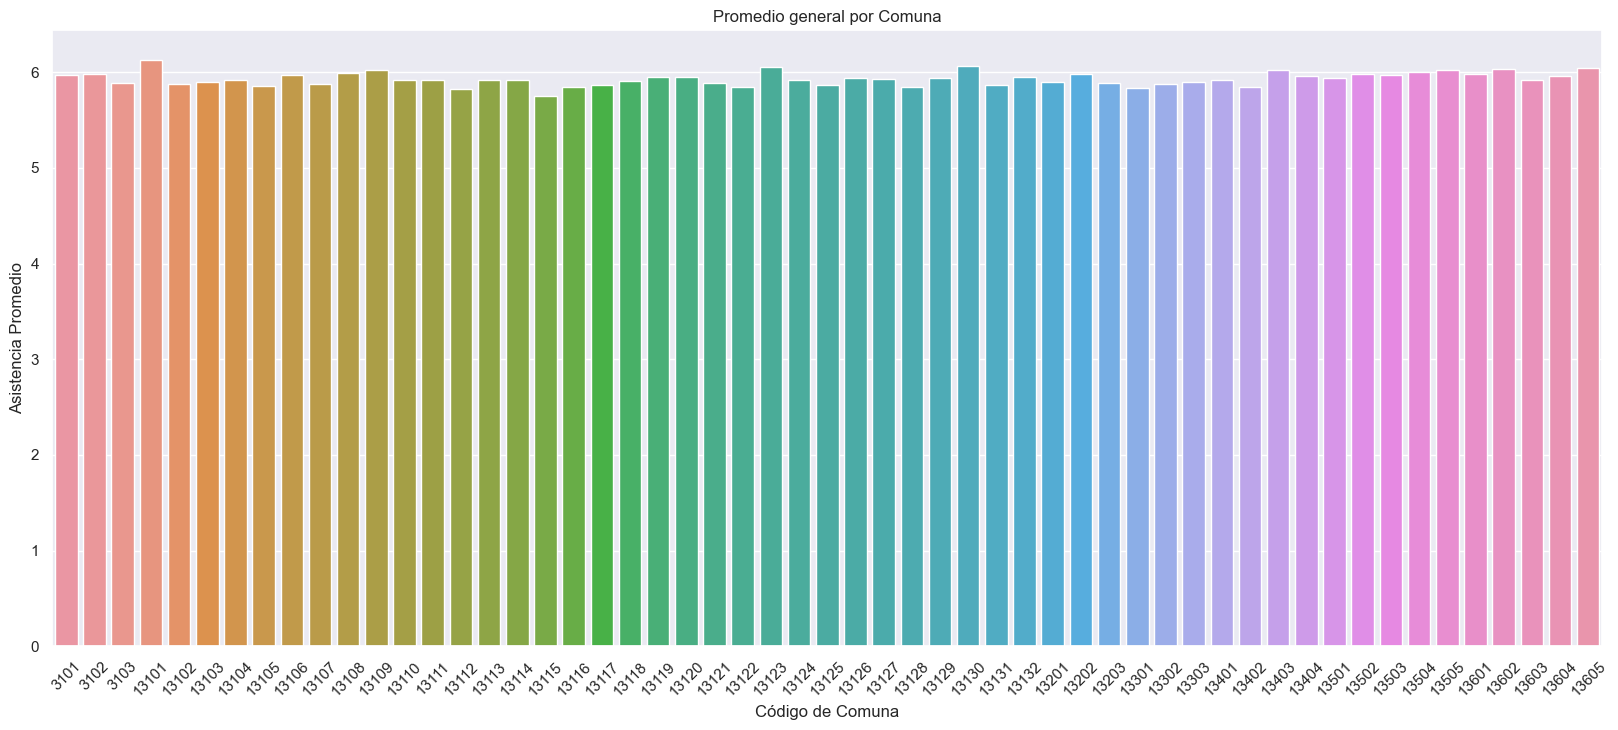

In [305]:
# grafico de barras para el promedio general por comuna

plt.figure(figsize=(20, 8))
sns.barplot(x='COD_COM_ALU', y='PROM_GRAL', data=df_estudiantes_comuna)
plt.title('Promedio general por Comuna')
plt.xlabel('Código de Comuna')
plt.ylabel('Asistencia Promedio')
plt.xticks(rotation=45)
plt.show()

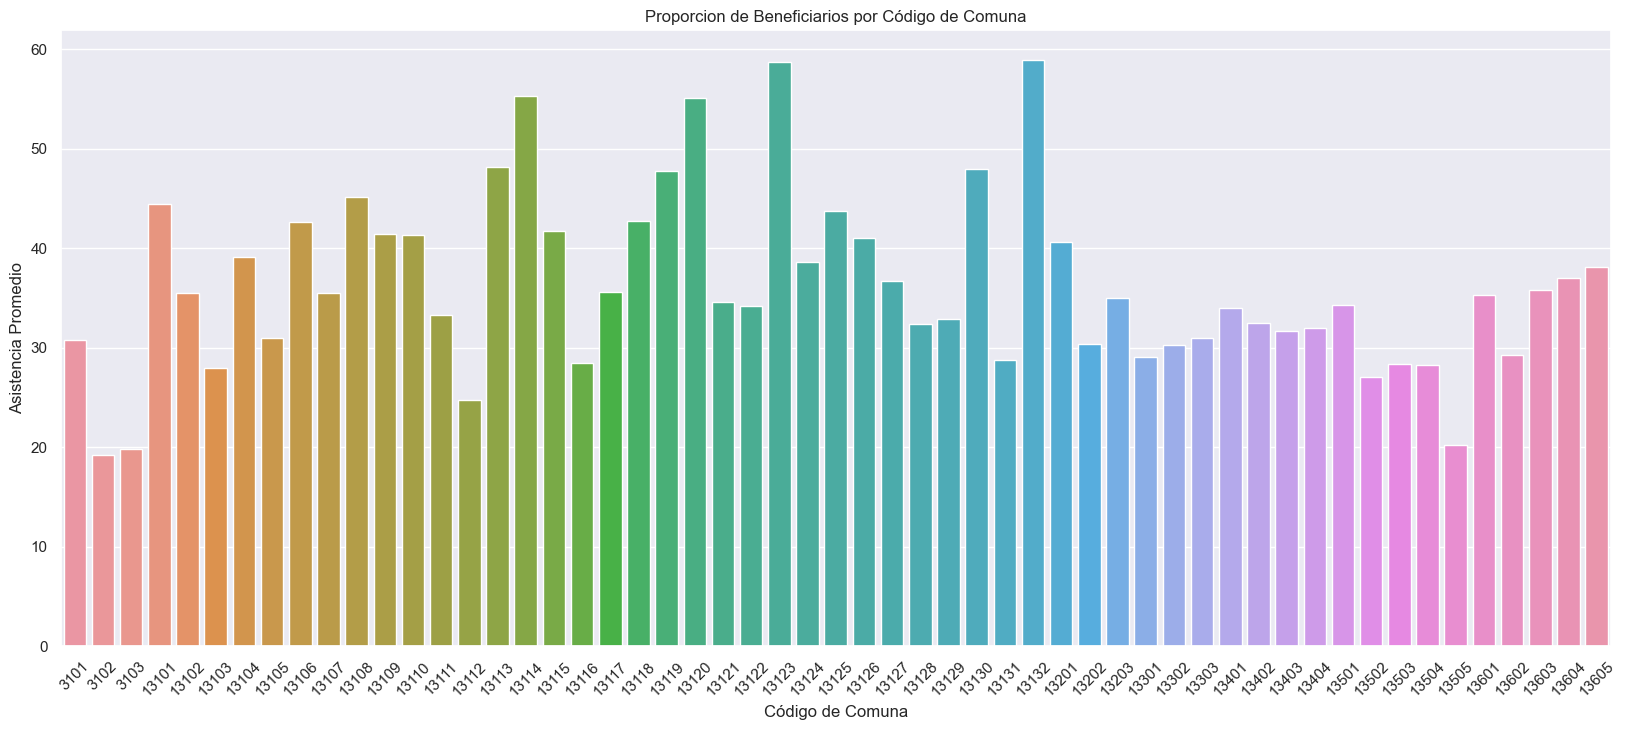

In [306]:

# grafico de barras para el porcentaje de preferentes por comuna

plt.figure(figsize=(20, 8))
sns.barplot(x='COD_COM_ALU', y='Porcentaje_preferentes', data=df_estudiantes_comuna)
plt.title('Proporcion de Beneficiarios por Código de Comuna')
plt.xlabel('Código de Comuna')
plt.ylabel('Asistencia Promedio')
plt.xticks(rotation=45)
plt.show()

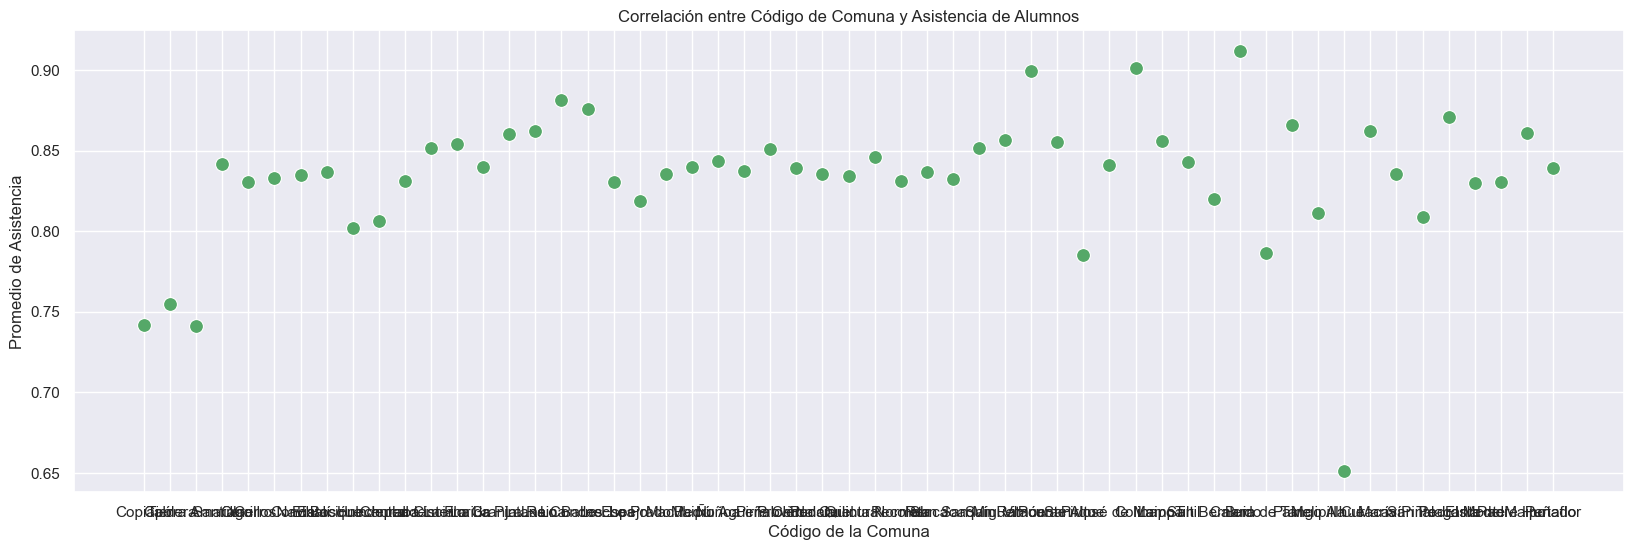

In [307]:
# Crear el gráfico de dispersión para el codigo de la comuna y la asistencia promedio
plt.figure(figsize=(20, 6))
sns.scatterplot(x='NOM_COM_ALU', y='ASIS_PROMEDIO', data=df_estudiantes_comuna, color='g', s=100)
plt.xlabel('Código de la Comuna')
plt.ylabel('Promedio de Asistencia')
plt.title('Correlación entre Código de Comuna y Asistencia de Alumnos')
plt.grid(True)
plt.show()

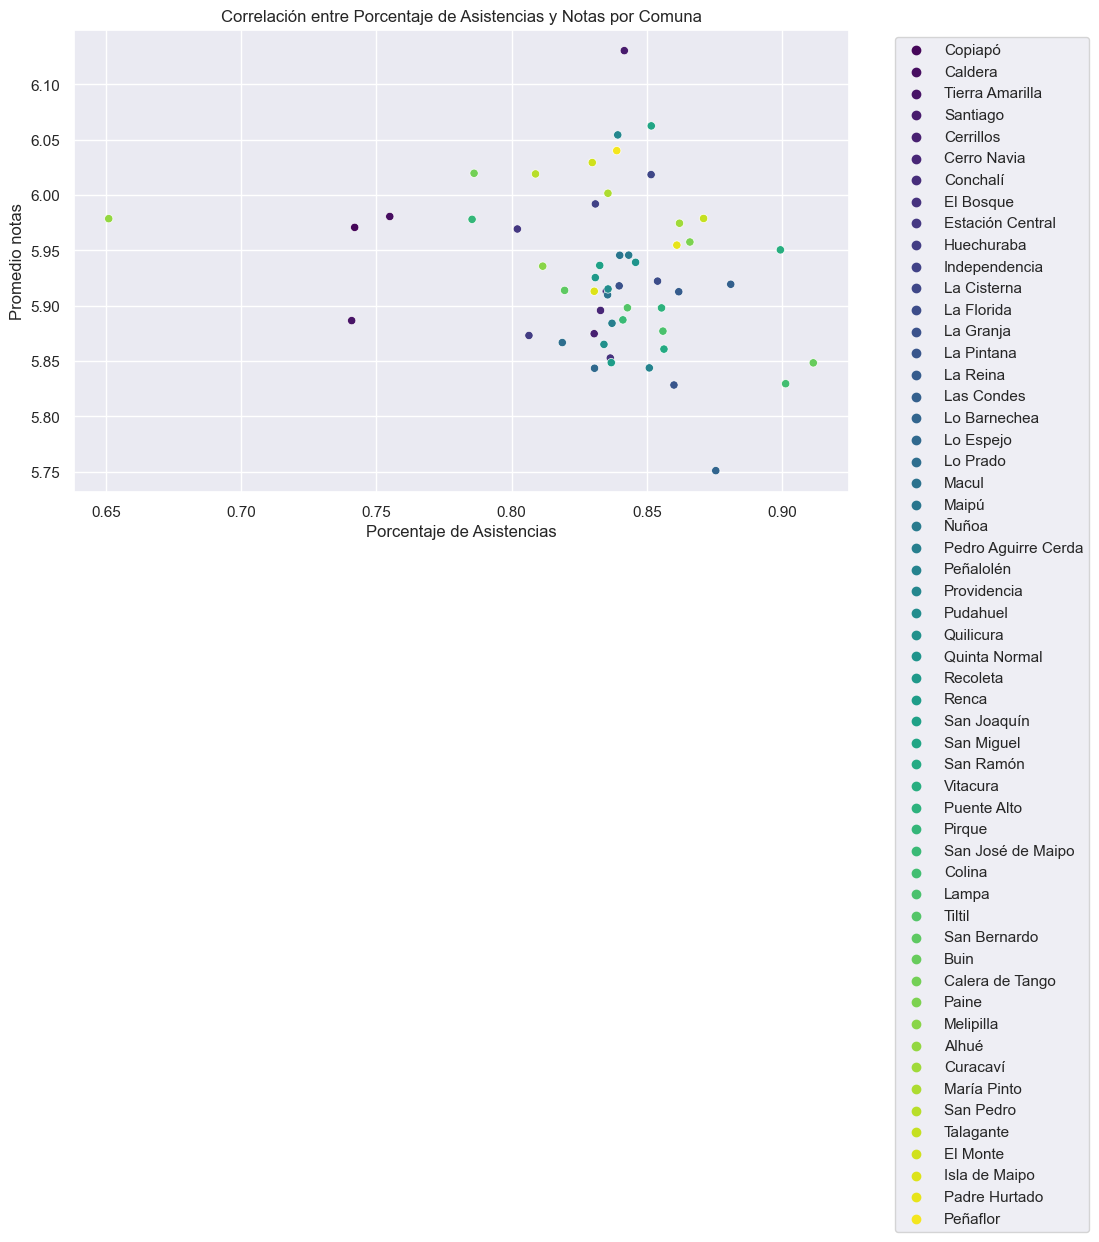

In [308]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_estudiantes_comuna, x='ASIS_PROMEDIO', y='PROM_GRAL', hue='NOM_COM_ALU', palette='viridis')
plt.title('Correlación entre Porcentaje de Asistencias y Notas por Comuna')
plt.xlabel('Porcentaje de Asistencias')
plt.ylabel('Promedio notas')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [309]:
# calcula la matriz de correlación
correlation_matrix = df_estudiantes_comuna[['ASIS_PROMEDIO', 'PROM_GRAL', 'Porcentaje_preferentes','Porcentaje_Reprobados']].corr()
correlation_matrix

,ASIS_PROMEDIO,PROM_GRAL,Porcentaje_preferentes,Porcentaje_Reprobados
ASIS_PROMEDIO,1.000000,-0.239913,0.400054,0.231028
PROM_GRAL,-0.239913,1.000000,0.202460,-0.569637
Porcentaje_preferentes,0.400054,0.202460,1.000000,0.097483
Porcentaje_Reprobados,0.231028,-0.569637,0.097483,1.000000


## Analisís de las correlaciones 

`Asistencia Promedio y Promedio General:`
Existe una correlación negativa moderada (-0.24) entre la asistencia promedio y el promedio general. Esto sugiere que hay una leve tendencia a que aquellos con un promedio general más alto tengan una asistencia promedio ligeramente menor, y viceversa, esta relación es sutil.

`Promedio General y Porcentaje de Reprobados:`
Existe una correlación negativa moderada (-0.57) entre el promedio general y el porcentaje de reprobados. Indica que a medida que el promedio general tiende a ser más alto, el porcentaje de reprobados tiende a ser menor.

`Asistencia Promedio y Porcentaje de Preferentes:`
Hay una correlación positiva moderada (0.40) entre la asistencia promedio y el porcentaje de estudiantes preferentes. Esto sugiere una tendencia donde a mayor asistencia promedio, mayor es el porcentaje de estudiantes preferentes.

`Promedio de Reprobados vs. Porcentaje de Preferentes:`
La correlación entre el porcentaje de reprobados y el porcentaje de estudiantes preferentes es baja (0.097). No hay una relación lineal significativa entre estas variables.


muy importante recordad que estas concluciones son hipotesis, pues la correlación no implica causalidad ;)

## 3. Estadísticas de resumen y relaciones entre variables; Analisis por provincia:

Esta sección presenta un resumen estadístico de los datos, proporcionando métricas clave que describen la distribución, la tendencia central y la dispersión de las variables en el conjunto de datos.

### Contenido:
- **Medidas de tendencia central:** Incluye la media, la mediana y la moda para comprender el valor central de las variables.
- **Medidas de dispersión:** Muestra la varianza, desviación estándar y rangos intercuartílicos para evaluar la dispersión de los datos.
- **Resúmenes adicionales:** Puede incorporar conteos, mínimos, máximos y otros resúmenes relevantes para cada variable.
- **gráficas de relaciones** 

## Aristas a analizar
**Estadisticas Resumen por provincia** 
- comparación entre provincia de copiapó y provincias de RM


In [310]:
df_estudiantes

,COD_PRO_RBD,RBD,MRUN,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,COD_ENSE2,DIAS_ASISTIDOS,ASIS_PROMEDIO,COD_REG_RBD,COD_JOR,PROM_GRAL,SIT_FIN_R,COD_COM_RBD,BEN_SEP,PREFERENTE_ALU,PRIORITARIO_ALU,CODIGO_COMUNA_ALUMNO,CODIGO_COMUNA_RBD,NOM_COM_ALU
0,31,396,1868052,2,200805,3101,7,14,0.700000,3,3,4.7,R,Copiapó,1,0,1,3101,3101,Copiapó
1,31,396,17387260,2,200712,3101,7,15,0.750000,3,3,3.6,R,Copiapó,1,1,0,3101,3101,Copiapó
2,31,396,19326217,1,200711,3101,7,10,0.500000,3,3,4.5,R,Copiapó,1,0,1,3101,3101,Copiapó
3,31,396,1131685,1,200703,3101,7,12,0.600000,3,3,3.7,R,Copiapó,1,0,1,3101,3101,Copiapó
4,31,396,23086414,2,200710,3101,7,14,0.700000,3,3,4.3,R,Copiapó,1,0,1,3101,3101,Copiapó
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567632,132,41859,22229505,2,201308,13201,2,21,1.000000,13,3,6.3,P,Puente Alto,1,0,1,13201,13201,Puente Alto
567633,132,41859,22558601,2,201312,13201,2,19,0.904762,13,3,6.8,P,Puente Alto,1,1,0,13201,13201,Puente Alto
567634,132,41859,24044317,2,201310,13201,2,20,0.952381,13,3,6.3,P,Puente Alto,1,0,1,13201,13201,Puente Alto
567635,136,42018,9949986,1,201302,13601,2,22,1.000000,13,1,5.6,P,Talagante,0,0,1,13601,13601,Talagante


In [312]:
estudiantes_mean_provincia= df_estudiantes[['ASIS_PROMEDIO','PROM_GRAL','DIAS_ASISTIDOS','COD_PRO_RBD']].groupby(by='COD_PRO_RBD',as_index=False).mean()

estudiantes_mean_provincia

,COD_PRO_RBD,ASIS_PROMEDIO,PROM_GRAL,DIAS_ASISTIDOS
0,31,0.742117,5.965576,14.787541
1,131,0.839823,5.913548,17.604850
2,132,0.851807,5.907900,17.946958
3,133,0.882863,5.860749,18.712288
4,134,0.844925,5.931246,17.385704
5,135,0.813845,5.964678,16.512598
6,136,0.852573,5.998902,17.622763


In [313]:
estudiantes_mean_provincia.describe()

,COD_PRO_RBD,ASIS_PROMEDIO,PROM_GRAL,DIAS_ASISTIDOS
count,7.000000,7.000000,7.000000,7.000000
mean,118.857143,0.832565,5.934657,17.224672
std,38.778983,0.044791,0.045863,1.258988
min,31.000000,0.742117,5.860749,14.787541
25%,131.500000,0.826834,5.910724,16.949151
50%,133.000000,0.844925,5.931246,17.604850
75%,134.500000,0.852190,5.965127,17.784861
max,136.000000,0.882863,5.998902,18.712288


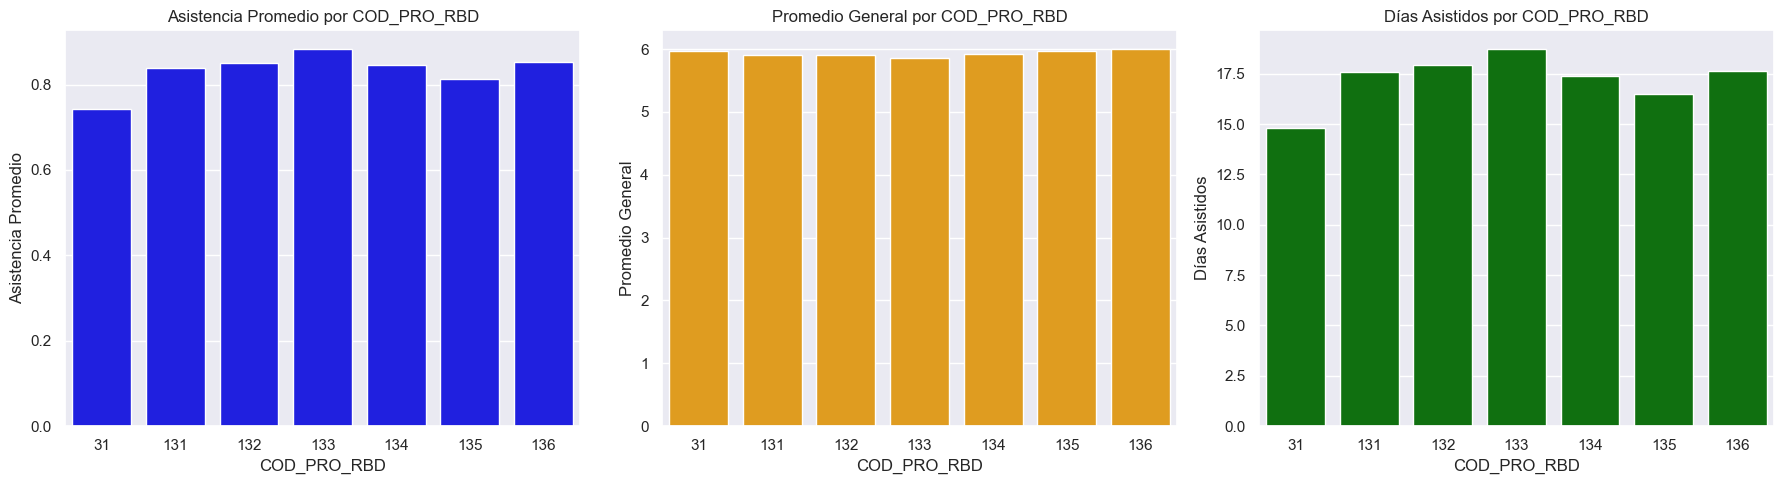

In [315]:
# figura con tres subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#asistencia promedio en el primer subplot
sns.barplot(data=estudiantes_mean_provincia, x='COD_PRO_RBD', y='ASIS_PROMEDIO', color='blue', ax=axes[0])
axes[0].set_xlabel('COD_PRO_RBD')
axes[0].set_ylabel('Asistencia Promedio')
axes[0].set_title('Asistencia Promedio por COD_PRO_RBD')

# promedio general en el segundo subplot
sns.barplot(data=estudiantes_mean_provincia, x='COD_PRO_RBD', y='PROM_GRAL', color='orange', ax=axes[1])
axes[1].set_xlabel('COD_PRO_RBD')
axes[1].set_ylabel('Promedio General')
axes[1].set_title('Promedio General por COD_PRO_RBD')

# dias asistidos en el tercer subplot
sns.barplot(data=estudiantes_mean_provincia, x='COD_PRO_RBD', y='DIAS_ASISTIDOS', color='green', ax=axes[2])
axes[2].set_xlabel('COD_PRO_RBD')
axes[2].set_ylabel('Días Asistidos')
axes[2].set_title('Días Asistidos por COD_PRO_RBD')

plt.tight_layout()
plt.show()

## 3. Estadísticas de resumen y relaciones entre variables; Analisis por Colegio y comuna:

Esta sección presenta un resumen estadístico de los datos, proporcionando métricas clave que describen la distribución, la tendencia central y la dispersión de las variables en el conjunto de datos.

### Contenido:
- **Medidas de tendencia central:** Incluye la media, la mediana y la moda para comprender el valor central de las variables.
- **Medidas de dispersión:** Muestra la varianza, desviación estándar y rangos intercuartílicos para evaluar la dispersión de los datos.
- **Resúmenes adicionales:** Puede incorporar conteos, mínimos, máximos y otros resúmenes relevantes para cada variable.
- **gráficas de relaciones** 

## Aristas a analizar
**Estadisticas Resumen por provincia** 
- comparación entre provincia de copiapó y provincias de RM

In [ ]:
estudiantes_mean_RBD = df_estudiantes.groupby('RBD').agg({
    'ASIS_PROMEDIO': 'mean',
    'PROM_GRAL': 'mean',
    'DIAS_ASISTIDOS': 'mean',
    'COD_COM_RBD': 'first',  # conservar el primer valor de COD_COM_RBD para cada RBD
    'CODIGO_COMUNA_RBD': 'first'   # conservar el primer valor de NOM_COM_RBD para cada RBD
}).reset_index()


In [ ]:
estudiantes_mean_RBD

In [ ]:
estudiantes_mean_RBD[['ASIS_PROMEDIO','PROM_GRAL','DIAS_ASISTIDOS']].describe()

In [ ]:
# Ordenar el DataFrame por la columna ASIS_PROMEDIO de manera ascendente
colegios_menor_asistencia = estudiantes_mean_RBD.sort_values('ASIS_PROMEDIO').head(20)

# Visualizar los colegios con el menor porcentaje de asistencia y sus comunas
colegios_menor_asistencia[['RBD', 'ASIS_PROMEDIO', 'COD_COM_RBD']]

`Asistencia promedio:`

La mayoría de los colegios parecen tener un buen promedio de asistencia, ya que la media se acerca al 83%. Sin embargo, la dispersión de datos es relativamente alta, ya que la desviación estándar es de aproximadamente el 10%, lo que sugiere que hay colegios con una gran variación en los niveles de asistencia.

`Promedio general` 

El promedio general de los estudiantes se encuentra alrededor de 5.94, con una desviación estándar de aproximadamente 0.28. Esto indica que la mayoría de los colegios mantienen un rendimiento bastante consistente, pero hay variaciones significativas entre los colegios.

`Días de asistencia:` 

La media de días de asistencia es de alrededor de 17.42, con un rango bastante amplio, desde aproximadamente 1.72 días hasta 22 días. Esto sugiere una variabilidad sustancial en la asistencia de los estudiantes a lo largo del año.

In [ ]:
# Gráfico de violín de la asistencia promedio por colegio
plt.figure(figsize=(12, 8))
sns.violinplot(data=estudiantes_mean_RBD, x='RBD', y='ASIS_PROMEDIO')
plt.xlabel('RBD (Código de colegio)')
plt.ylabel('Asistencia Promedio')
plt.title('Distribución de Asistencia Promedio por Colegio')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()

# Gráfico de violín de la asistencia promedio por comuna
plt.figure(figsize=(12, 8))
sns.violinplot(data=estudiantes_mean_RBD, x='CODIGO_COMUNA_RBD', y='ASIS_PROMEDIO')
plt.xlabel('Código de Comuna')
plt.ylabel('Asistencia Promedio')
plt.title('Distribución de Asistencia Promedio por Comuna')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()

## 4. Análisis Exploratorio Multivariado

Esta sección se enfoca en explorar las relaciones y patrones entre múltiples variables simultáneamente, investigando cómo se comportan en conjunto y cómo se relacionan entre sí.

### Contenido:
- **Gráficos multivariados:** Diagramas de dispersión, mapas de calor y gráficos 3D que permiten visualizar interacciones entre varias variables.
- **Análisis factorial o de clusters:** Técnicas que agrupan variables similares o reducen la dimensionalidad para identificar patrones ocultos.